In [1]:
from glob import glob
import sys
import getpass
import os
# import psutil
from os.path import join, dirname
from os.path import getsize
import pickle
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.stats.multitest
# from statsmodels.sandbox.stats.multicomp import multipletests

# import nilearn.masking
from nilearn import plotting as nplt
from nilearn import image as niimg
import nilearn.decoding

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
# from sklearn.svm import LinearSVC

# import mydef as my Class correction for projects
import mydef

/usr/local/anaconda3/envs/sampark/lib/python3.9/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
GA = mydef.GA()

OS : darwin
Google Drive is detected!
Git directory is detected!


---

## Check replications

### 1. Yera and Yunha's correlation matrix

In [12]:
# data_dir = join(GA.dir_root,'NAS05_data','fmri_data','glm_results','MO_errts')
# temp = join(data_dir,'network_analysis','20200213_MOerrts_AM1_corrmat.pkl')
# with open(temp,"rb") as file:
#     print(temp)
#     ## key: subj, run, (roiA, roiB)
#     ## value: Correlation Coefficient
#     corrmat = pickle.load(file)

/Users/clmn/Google Drive/내 드라이브/GA/NAS05_data/fmri_data/glm_results/MO_errts/network_analysis/20200213_MOerrts_AM1_corrmat.pkl


1. Visual areas and DMN Core

In [3]:
# GA.load_fan()

In [6]:
# ## DMN regions
# module_names = ['Core']

# for name in module_names:
#     temp = glob(join(GA.dir_dmn, name+'_*.nii'))
#     for path in temp:
#         fname = path.split('/')[-1].replace('.nii', '')
#         GA.roi_imgs[fname] = nilearn.image.load_img(path)

# ## yeo_17network == 1
# dt = pd.DataFrame()
# for nn in [1]:
#     dt = dt.append(GA.fan_info[(GA.fan_info.yeo_17network == nn)])
# for idx in dt.index:
#     nn = dt.loc[idx,'label']
#     region = dt.loc[idx,'region']
#     GA.roi_imgs[region] = GA.fan_imgs[str(nn)]

# GA.roi_imgs.keys()

dict_keys(['Core_PCC_r', 'Core_aMPFC_l', 'Core_PCC_l', 'Core_aMPFC_r', 'FuG_L_3_2', 'FuG_R_3_2', 'MVOcC_L_5_1', 'MVOcC_R_5_1', 'MVOcC_L_5_3', 'MVOcC_R_5_3', 'MVOcC_R_5_4', 'LOcC_L_4_1', 'LOcC_R_4_1', 'LOcC_L_4_3', 'LOcC_R_4_3', 'LOcC_L_4_4', 'LOcC_R_4_4', 'LOcC_L_2_2'])

2. Calculating task-related networks

In [8]:
# subj = '01'
# visit = 'early'
# run = 1

# GA.make_df_functional_correl_from_tsmean(subj, visit, run, GA.roi_imgs.keys())

,subj,visit,mapping,run,roiA,roiB,Pearson_r,pval
0,01,early,practice,1,Core_PCC_l,Core_PCC_l,1.000000,0.000000e+00
1,01,early,practice,1,Core_PCC_l,Core_PCC_r,0.898462,0.000000e+00
2,01,early,practice,1,Core_PCC_l,Core_aMPFC_l,0.694388,1.579097e-158
3,01,early,practice,1,Core_PCC_l,Core_aMPFC_r,0.574191,3.919469e-97
4,01,early,practice,1,Core_PCC_l,FuG_L_3_2,0.434554,1.058436e-51
...,...,...,...,...,...,...,...,...
319,01,early,unpractice,6,MVOcC_R_5_4,MVOcC_L_5_1,0.825047,1.823948e-273
320,01,early,unpractice,6,MVOcC_R_5_4,MVOcC_L_5_3,0.607123,2.321859e-111
321,01,early,unpractice,6,MVOcC_R_5_4,MVOcC_R_5_1,0.755544,3.489742e-203
322,01,early,unpractice,6,MVOcC_R_5_4,MVOcC_R_5_3,0.789492,3.600201e-234


3. Comparing them

In [30]:
# gg = 'GA' if visit=='early' else ('GB' if visit=='late' else None)
# mapping = 'practice' if run <= 3 else('unpractice' if run > 3 else 'invalid')

# coef_YY = []
# coef = np.array(GA.df_functional_correl.Pearson_r)

# sorted_rois = sorted(GA.roi_imgs.keys())
# for roiA in sorted_rois:
#     for roiB in sorted_rois:
#         coef_YY.append(corrmat[gg+subj,run,(roiA,roiB)])
# coef_YY = np.array(coef_YY)

In [1]:
# coef - coef_YY

4. $\textbf{Conclusion}$: '20200213_MOerrts_AM1_corrmat.pkl' == My correlation matrix, 'GA.df_functional_correl'

### 2. Yera and Yunha's a recruitment file (Late - Early)

In [15]:
data_dir = join(GA.dir_root,'NAS05_data','fmri_data','glm_results','MO_errts')

1. A recruitment file (Late - Early)

In [16]:
with open(join(data_dir,'MO_errts_AM1_recruitment_prac_late-early.pkl'),'rb') as fr:
    ## key: mapping, ()
    recruitment = pickle.load(file=fr)

2. transposing the recruitment file to DataFrame

In [21]:
temp = pd.read_csv(join(data_dir,'conn_comb.tsv'), index_col=0)
temp

,subj,prac,behav,rcr_dmn,rcr_core,rcr_dmsub,rcr_core_dmsub,rcr_vis,rcr_mot,intg_vis_dmn,...,intg_vis_dmsub,intg_vis_core_dmsub,intg_mot_dmn,intg_mot_core,intg_mot_dmsub,intg_mot_core_dmsub,intg_task_dmn,intg_task_core,intg_task_dmsub,intg_task_core_dmsub
1,GA01,prac,0.417419,-0.103570,-0.118566,-0.062610,-0.106172,0.016287,-0.003815,-0.113725,...,-0.158438,-0.143824,-0.048679,-0.040207,-0.088327,-0.064329,-0.092550,-0.102630,-0.138719,-0.119447
2,GA02,prac,0.360081,0.013481,-0.028470,0.035389,-0.007518,0.051266,-0.100603,0.020214,...,0.033600,0.015019,0.117440,0.047972,0.116586,0.098419,0.049168,-0.006517,0.063294,0.042184
3,GA05,prac,0.346667,0.048872,0.088557,0.015633,0.039004,0.055081,0.061986,0.029226,...,0.043215,0.062298,0.068711,0.145580,0.042031,0.084334,0.056570,0.123231,0.053716,0.082903
4,GA07,prac,0.412720,-0.026085,0.042960,-0.049909,-0.018980,-0.023266,-0.181402,-0.176416,...,-0.162092,-0.209417,0.027160,0.014286,0.036141,0.031276,-0.108028,-0.170461,-0.094201,-0.130339
5,GA08,prac,0.212870,-0.171727,-0.063840,-0.094837,-0.145378,0.046188,-0.063819,-0.022113,...,-0.164946,-0.088188,0.201376,0.142111,0.096033,0.146802,0.046977,0.023879,-0.088342,-0.016496
6,GA11,prac,0.475243,-0.146506,-0.033110,-0.118157,-0.121286,-0.184554,-0.060405,-0.111644,...,-0.166317,-0.164692,-0.106477,-0.178146,-0.142495,-0.143151,-0.100386,-0.186364,-0.152574,-0.151531
7,GA12,prac,0.345544,-0.021644,0.053325,-0.040779,-0.053949,0.019848,0.040021,-0.024788,...,-0.004110,-0.018213,-0.181093,-0.143457,-0.186243,-0.165796,-0.064946,-0.098421,-0.057714,-0.059297
8,GA13,prac,0.329375,0.177759,-0.043590,0.217391,0.104026,0.185847,0.069396,0.075519,...,0.167532,0.144056,0.271868,0.192952,0.321320,0.296070,0.129210,0.105767,0.218252,0.192599
9,GA14,prac,0.545197,-0.050815,-0.050410,-0.046664,-0.068760,-0.007069,0.031257,-0.030788,...,-0.039221,-0.030967,-0.234723,-0.233454,-0.235090,-0.234472,-0.093133,-0.105166,-0.100384,-0.094693
10,GA15,prac,0.419329,-0.059917,0.041401,-0.047932,-0.030137,0.028375,-0.156555,-0.240224,...,-0.297786,-0.352405,-0.160415,-0.260338,-0.193630,-0.233928,-0.231385,-0.368954,-0.284595,-0.338021


In [22]:
recruitment['prac', ('visual', 'core')]

array([-0.13279914, -0.02584842,  0.08859066, -0.25375935, -0.02829657,
       -0.19479731, -0.08477092,  0.06945622, -0.04476205, -0.38321415,
       -0.05812683,  0.24580689, -0.1265635 , -0.3131268 ,  0.04489332,
       -0.08043432, -0.15632925, -0.18176357,  0.03461   ,  0.16250444,
       -0.04613103,  0.42788879, -0.29710829, -0.11095207,  0.2223397 ,
       -0.22697662, -0.08919894, -0.23729363, -0.08099848, -0.13813557])

In [23]:
np.array(temp['intg_vis_core'][:30])

array([-0.13279914, -0.02584842,  0.08859066, -0.25375935, -0.02829657,
       -0.19479731, -0.08477092,  0.06945622, -0.04476205, -0.38321415,
       -0.05812683,  0.24580689, -0.1265635 , -0.3131268 ,  0.04489332,
       -0.08043432, -0.15632925, -0.18176357,  0.03461   ,  0.16250444,
       -0.04613103,  0.42788879, -0.29710829, -0.11095207,  0.2223397 ,
       -0.22697662, -0.08919894, -0.23729363, -0.08099848, -0.13813557])

3. plot

In [24]:
X = temp['intg_vis_core'][:30]
Y = np.array(temp.behav[:30])

Text(0.5, 1.0, 'r=-0.5492 (p=0.002)')

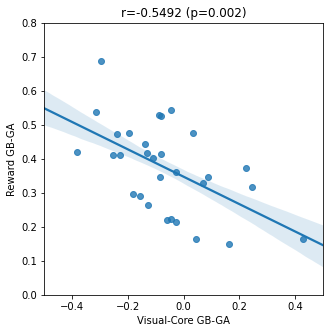

In [25]:
fig = plt.figure(figsize=(5, 5))
plt.xlim(-0.5, 0.5)
plt.ylim(-0., 0.8)
sns.regplot(x=X, y=Y, ci=68, truncate=False)
plt.ylabel('Reward GB-GA')
plt.xlabel('Visual-Core GB-GA')
plt.title('r=%.4f (p=%.3f)' % (*scipy.stats.pearsonr(x=X, y=Y),))

In [26]:
## Lower-Tailed t-Test
scipy.stats.ttest_1samp(X, popmean=0, alternative='less')

Ttest_1sampResult(statistic=-2.0615330330018002, pvalue=0.024158324680980958)

---

## 0. ROIs

- Visual areas, DMN Core, and motor system

In [3]:
GA.load_fan()

In [4]:
rois_ = {}

## DMN regions
modules = ['Core']

for module in modules:
    rois_[module] = []
    temp = glob(join(GA.dir_mask, 'DMN', module+'_*.nii'))
    for path in temp:
        region = path.split('/')[-1].replace('.nii', '')
        rois_[module].append(region)
        GA.roi_imgs[region] = nilearn.image.load_img(path)

## yeo_17network == 1
module = 'yeo_17network'

rois_[module] = []

dt = pd.DataFrame()
for nn in [1]:
    dt = dt.append(GA.fan_info[(GA.fan_info.yeo_17network == nn)])
for idx in dt.index:
    nn = dt.loc[idx,'label']
    region = dt.loc[idx,'region']
    GA.roi_imgs[region] = GA.fan_imgs[str(nn)]
    rois_[module].append(region)

## localizer
module = 'localizer'

rois_[module] = []

temp = {}
path_list = sorted(glob(join(GA.dir_mask, module, 'n200_*.nii')))
for path in path_list:
    roi = path.split('/')[-1].replace('_mask.nii', '')
    temp[roi] = nilearn.image.load_img(path)
    
list_key = ['n200_c1_L_Postcentral'
            , 'n200_c2_R_CerebellumIV-V'
            , 'n200_c3_R_Postcentral'
            , 'n200_c4_L_Putamen'
            , 'n200_c5_R_SMA'
            , 'n200_c6_R_CerebellumVIIIb'
            , 'n200_c7_L_Thalamus']
for key in list_key:
    GA.roi_imgs[key] = temp[key]
    rois_[module].append(key)

In [5]:
list(GA.roi_imgs.keys())

['Core_PCC_r',
 'Core_aMPFC_l',
 'Core_PCC_l',
 'Core_aMPFC_r',
 'FuG_L_3_2',
 'FuG_R_3_2',
 'MVOcC_L_5_1',
 'MVOcC_R_5_1',
 'MVOcC_L_5_3',
 'MVOcC_R_5_3',
 'MVOcC_R_5_4',
 'LOcC_L_4_1',
 'LOcC_R_4_1',
 'LOcC_L_4_3',
 'LOcC_R_4_3',
 'LOcC_L_4_4',
 'LOcC_R_4_4',
 'LOcC_L_2_2',
 'n200_c1_L_Postcentral',
 'n200_c2_R_CerebellumIV-V',
 'n200_c3_R_Postcentral',
 'n200_c4_L_Putamen',
 'n200_c5_R_SMA',
 'n200_c6_R_CerebellumVIIIb',
 'n200_c7_L_Thalamus']

In [6]:
rois_

{'Core': ['Core_PCC_r', 'Core_aMPFC_l', 'Core_PCC_l', 'Core_aMPFC_r'],
 'yeo_17network': ['FuG_L_3_2',
  'FuG_R_3_2',
  'MVOcC_L_5_1',
  'MVOcC_R_5_1',
  'MVOcC_L_5_3',
  'MVOcC_R_5_3',
  'MVOcC_R_5_4',
  'LOcC_L_4_1',
  'LOcC_R_4_1',
  'LOcC_L_4_3',
  'LOcC_R_4_3',
  'LOcC_L_4_4',
  'LOcC_R_4_4',
  'LOcC_L_2_2'],
 'localizer': ['n200_c1_L_Postcentral',
  'n200_c2_R_CerebellumIV-V',
  'n200_c3_R_Postcentral',
  'n200_c4_L_Putamen',
  'n200_c5_R_SMA',
  'n200_c6_R_CerebellumVIIIb',
  'n200_c7_L_Thalamus']}

- Fan280

In [6]:
GA.load_fan()

Google Drive is detected!


In [7]:
## make full mask
fname = join(GA.dir_mask,'fan280','fan.roi.GA.001.nii.gz')
fmask = nilearn.image.load_img(fname)
temp = nilearn.image.math_img(img1=fmask, formula='img1 * 0.')
for region, img in GA.fan_imgs.items():
    temp = nilearn.image.math_img(img1=temp, img2=img, formula='img1 + img2')
global_mask = temp

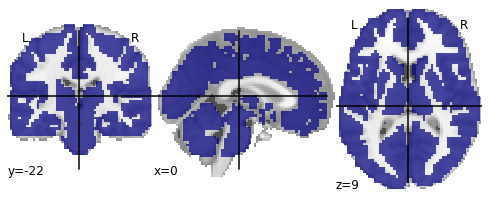

In [9]:
fig = nilearn.plotting.plot_roi(global_mask)

## 1. Calculating Functional Correlation

- Calculating a correlation by tsmean.bp_demean.errts (run once), then save the result.

In [6]:
for subj in GA.list_subj:
    for stage in GA.list_stage:
        GA.df_functional_correlation = GA.df_functional_correlation.append(GA.make_df_func_correl_from_tsmean(subj, stage, rois=GA.roi_imgs.keys()))
GA.df_functional_correlation

,subj,stage,run,roiA,roiB,Pearson_r,pval
0,01,early_practice,r01,Core_PCC_l,Core_PCC_l,1.000000,0.000000e+00
1,01,early_practice,r01,Core_PCC_l,Core_PCC_r,0.898462,0.000000e+00
2,01,early_practice,r01,Core_PCC_l,Core_aMPFC_l,0.694388,1.579097e-158
3,01,early_practice,r01,Core_PCC_l,Core_aMPFC_r,0.574191,3.919469e-97
4,01,early_practice,r01,Core_PCC_l,FuG_L_3_2,0.434554,1.058436e-51
...,...,...,...,...,...,...,...
970,44,late_unpractice,r03,n200_c5_R_SMA,n200_c6_R_CerebellumVIIIb,0.829707,2.824152e-279
971,44,late_unpractice,r03,n200_c5_R_SMA,n200_c7_L_Thalamus,0.716477,2.750078e-173
972,44,late_unpractice,r03,n200_c6_R_CerebellumVIIIb,n200_c6_R_CerebellumVIIIb,1.000000,0.000000e+00
973,44,late_unpractice,r03,n200_c6_R_CerebellumVIIIb,n200_c7_L_Thalamus,0.717807,3.202472e-174


In [7]:
GA.save_as_pkl(data=GA.df_functional_correlation, path=GA.dir_script, suffix="tsmean.MO.functional_correlation.visual-core-localizer")

- Calculating a correlation by bp_demean.errts (run once), then save the result.

In [5]:
# temp = GA.df_functional_correl
    
# for subj in GA.list_subj:
#     for visit in ['early','late']:
#         GA.make_df_functional_correl_from_errts(
#             subj, visit, 'practice'
#             , fdir='GLM.MO', fname='global_activity.bp_demean.errts.MO'
#             , rois=GA.roi_imgs
#         )
#         temp = temp.append(GA.df_functional_correl)
# GA.df_functional_correl = temp

In [17]:
# GA.save_pkl(GA.df_functional_correl, suffix="global_activity.bp_demean.errts.MO.functional_correlation.Yeo1-core")

## 2. Bring about the above results

In [83]:
temp = GA.show_pkl_list(path=GA.dir_script , word="corr")
temp

,name,identity
0,./20210531.errts_correl.Yeo1s-Cores.pkl,a
1,./20210517.func_correl.Core-Yeo1.pkl,b
2,./20210618.errts_correl.MO.RO.Yeo1s-Cores.pkl,c
3,./20210727.tsmean.MO.functional_correlation.Ye...,d
4,./20210830.tsmean.MO.functional_correlation.vi...,e
5,./20210713.bp_demean.errts.MO.functional_corre...,f
6,./20210712.global_activity.bp_demean.errts.MO....,g
7,./20210525.func_correl.Yeo1s-Cores.pkl,h
8,./20210628.bp_demean.errts_correl.MO.RO.Yeo1-C...,i


In [8]:
with open(list(temp.name)[2], 'rb') as fr:
    GA.df_functional_correlation = pickle.load(fr)
GA.df_functional_correlation

,subj,stage,run,roiA,roiB,Pearson_r,pval
0,01,early_practice,r01,Core_PCC_l,Core_PCC_l,1.000000,0.000000e+00
1,01,early_practice,r01,Core_PCC_l,Core_PCC_r,0.898462,0.000000e+00
2,01,early_practice,r01,Core_PCC_l,Core_aMPFC_l,0.694388,1.579097e-158
3,01,early_practice,r01,Core_PCC_l,Core_aMPFC_r,0.574191,3.919469e-97
4,01,early_practice,r01,Core_PCC_l,FuG_L_3_2,0.434554,1.058436e-51
...,...,...,...,...,...,...,...
970,44,late_unpractice,r03,n200_c5_R_SMA,n200_c6_R_CerebellumVIIIb,0.829707,2.824152e-279
971,44,late_unpractice,r03,n200_c5_R_SMA,n200_c7_L_Thalamus,0.716477,2.750078e-173
972,44,late_unpractice,r03,n200_c6_R_CerebellumVIIIb,n200_c6_R_CerebellumVIIIb,1.000000,0.000000e+00
973,44,late_unpractice,r03,n200_c6_R_CerebellumVIIIb,n200_c7_L_Thalamus,0.717807,3.202472e-174


In [9]:
sorted_rois = GA.df_functional_correlation.roiA.unique()
print(sorted_rois.shape, sorted_rois)

(25,) ['Core_PCC_l' 'Core_PCC_r' 'Core_aMPFC_l' 'Core_aMPFC_r' 'FuG_L_3_2'
 'FuG_R_3_2' 'LOcC_L_2_2' 'LOcC_L_4_1' 'LOcC_L_4_3' 'LOcC_L_4_4'
 'LOcC_R_4_1' 'LOcC_R_4_3' 'LOcC_R_4_4' 'MVOcC_L_5_1' 'MVOcC_L_5_3'
 'MVOcC_R_5_1' 'MVOcC_R_5_3' 'MVOcC_R_5_4' 'n200_c1_L_Postcentral'
 'n200_c2_R_CerebellumIV-V' 'n200_c3_R_Postcentral' 'n200_c4_L_Putamen'
 'n200_c5_R_SMA' 'n200_c6_R_CerebellumVIIIb' 'n200_c7_L_Thalamus']


In [10]:
## A array representing group types
group = []
cnt = 1
for _, value in rois_.items():
    temp = np.ones(len(value)) * cnt
    group.append(temp)
    cnt += 1
group = np.concatenate(group).astype(int)
group

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3])

In [11]:
def comb_group(group):
    list_ = np.unique(group).astype(int)

    res = []
    for i, g1 in enumerate(list_):
        for g2 in list_[:i+1]:
            res.append(sorted([g1, g2]))
    return res

comb_group(group)

[[1, 1], [1, 2], [2, 2], [1, 3], [2, 3], [3, 3]]

## 3. Calculating Interaction Strength through Quick & Dirty Method

In [12]:
# ## The module 'GA.make_df_correlation_matrix' is work?
# subj = '01'
# stage = 'early_practice'

# print(subj, stage)
# GA.make_df_correlation_matrix(subj, stage, group=group)

01 early_practice


,Core_PCC_l,Core_PCC_r,Core_aMPFC_l,Core_aMPFC_r,FuG_L_3_2,FuG_R_3_2,LOcC_L_2_2,LOcC_L_4_1,LOcC_L_4_3,LOcC_L_4_4,...,MVOcC_R_5_1,MVOcC_R_5_3,MVOcC_R_5_4,n200_c1_L_Postcentral,n200_c2_R_CerebellumIV-V,n200_c3_R_Postcentral,n200_c4_L_Putamen,n200_c5_R_SMA,n200_c6_R_CerebellumVIIIb,n200_c7_L_Thalamus
Core_PCC_l,1.000000,0.903617,0.772356,0.679574,0.661496,0.683653,0.581030,0.570440,0.461929,0.579109,...,0.503528,0.603859,0.677169,0.538685,0.539200,0.477066,0.555841,0.527215,0.610355,0.528139
Core_PCC_r,0.903617,1.000000,0.755200,0.703500,0.674330,0.702609,0.613208,0.566224,0.454105,0.576501,...,0.552186,0.600608,0.705629,0.521470,0.523319,0.486033,0.552806,0.530081,0.575394,0.555788
Core_aMPFC_l,0.772356,0.755200,1.000000,0.925228,0.634724,0.606363,0.501275,0.561061,0.428769,0.523050,...,0.411319,0.500947,0.520932,0.492018,0.419435,0.457463,0.559770,0.484709,0.522315,0.529520
Core_aMPFC_r,0.679574,0.703500,0.925228,1.000000,0.692957,0.648432,0.579991,0.661556,0.436913,0.582924,...,0.425786,0.507492,0.533378,0.560194,0.499780,0.558887,0.643874,0.585299,0.581631,0.622183
FuG_L_3_2,0.661496,0.674330,0.634724,0.692957,1.000000,0.872628,0.840551,0.804343,0.516133,0.831493,...,0.597150,0.566626,0.725640,0.638621,0.726185,0.707859,0.766945,0.725703,0.789677,0.701850
FuG_R_3_2,0.683653,0.702609,0.606363,0.648432,0.872628,1.000000,0.756341,0.753151,0.526695,0.751195,...,0.705491,0.743436,0.860522,0.754232,0.810491,0.758739,0.806725,0.789823,0.862996,0.769310
LOcC_L_2_2,0.581030,0.613208,0.501275,0.579991,0.840551,0.756341,1.000000,0.823557,0.590760,0.777176,...,0.604170,0.546416,0.673460,0.586729,0.621573,0.660845,0.697172,0.688379,0.679094,0.694197
LOcC_L_4_1,0.570440,0.566224,0.561061,0.661556,0.804343,0.753151,0.823557,1.000000,0.659494,0.824943,...,0.517372,0.515385,0.569700,0.648920,0.645396,0.698976,0.726802,0.735783,0.719283,0.733625
LOcC_L_4_3,0.461929,0.454105,0.428769,0.436913,0.516133,0.526695,0.590760,0.659494,1.000000,0.762062,...,0.307019,0.335108,0.485833,0.531080,0.466905,0.461002,0.530906,0.550713,0.509827,0.555363
LOcC_L_4_4,0.579109,0.576501,0.523050,0.582924,0.831493,0.751195,0.777176,0.824943,0.762062,1.000000,...,0.464927,0.454206,0.649206,0.625225,0.682163,0.650118,0.713768,0.707726,0.742984,0.682031


In [13]:
## Initializing a result variable
res = {}
for [g1,g2] in comb_group(group):
    if g1!=g2:
        res[(g1,g2)] = []

## Main calculation
for subj in GA.list_subj:
    corrmat = {}
    I = {}

    ## Matrix implementation & initializing an interaction variable
    for stage in ['early_practice', 'late_practice']:
        corrmat[stage] = GA.make_df_correlation_matrix(subj, stage, group=group)
        for [g1,g2] in comb_group(group):
            I[stage, (g1,g2)] = []
    ## Inserting elements of the matrix one by one
    for stage in ['early_practice', 'late_practice']:
        for a, roiA in enumerate(sorted_rois):
            for b, roiB in enumerate(sorted_rois):
                [g1,g2] = sorted([group[a], group[b]])
                element = corrmat[stage].loc[roiA][roiB]
                I[stage, (g1,g2)].append(element)

    ## Normalizing interaction strength
    Ip = {}
    for [g1,g2] in comb_group(group):
        if g1==g2:
            continue
        for stage in ['early_practice', 'late_practice']:
            Ip[stage,(g1,g2)] = np.mean(I[stage,(g1,g2)])/np.sqrt(np.mean(I[stage,(g1,g1)])*np.mean(I[stage,(g2,g2)]))
        res[(g1,g2)].append(Ip['late_practice',(g1,g2)] - Ip['early_practice',(g1,g2)])

In [120]:
# ## check the validation

# for stage in GA.list_stage:
#     for [g1,g2] in comb_group(group):
#         n_g1 = (group == g1).sum()
#         n_g2 = (group == g2).sum()
#         correction = 1 if g1==g2 else 2
#         print(subj, stage, g1, g2, '%d*%d*%d='%(n_g1, n_g2, correction), len(I[stage, (g1,g2)]))

44 early_practice 1 1 4*4*1= 16
44 early_practice 1 2 4*14*2= 112
44 early_practice 2 2 14*14*1= 196
44 early_practice 1 3 4*7*2= 56
44 early_practice 2 3 14*7*2= 196
44 early_practice 3 3 7*7*1= 49
44 early_unpractice 1 1 4*4*1= 16
44 early_unpractice 1 2 4*14*2= 112
44 early_unpractice 2 2 14*14*1= 196
44 early_unpractice 1 3 4*7*2= 56
44 early_unpractice 2 3 14*7*2= 196
44 early_unpractice 3 3 7*7*1= 49
44 late_practice 1 1 4*4*1= 16
44 late_practice 1 2 4*14*2= 112
44 late_practice 2 2 14*14*1= 196
44 late_practice 1 3 4*7*2= 56
44 late_practice 2 3 14*7*2= 196
44 late_practice 3 3 7*7*1= 49
44 late_unpractice 1 1 4*4*1= 16
44 late_unpractice 1 2 4*14*2= 112
44 late_unpractice 2 2 14*14*1= 196
44 late_unpractice 1 3 4*7*2= 56
44 late_unpractice 2 3 14*7*2= 196
44 late_unpractice 3 3 7*7*1= 49


## 4. *Drawing functional connectivity matrices (run once), then save it

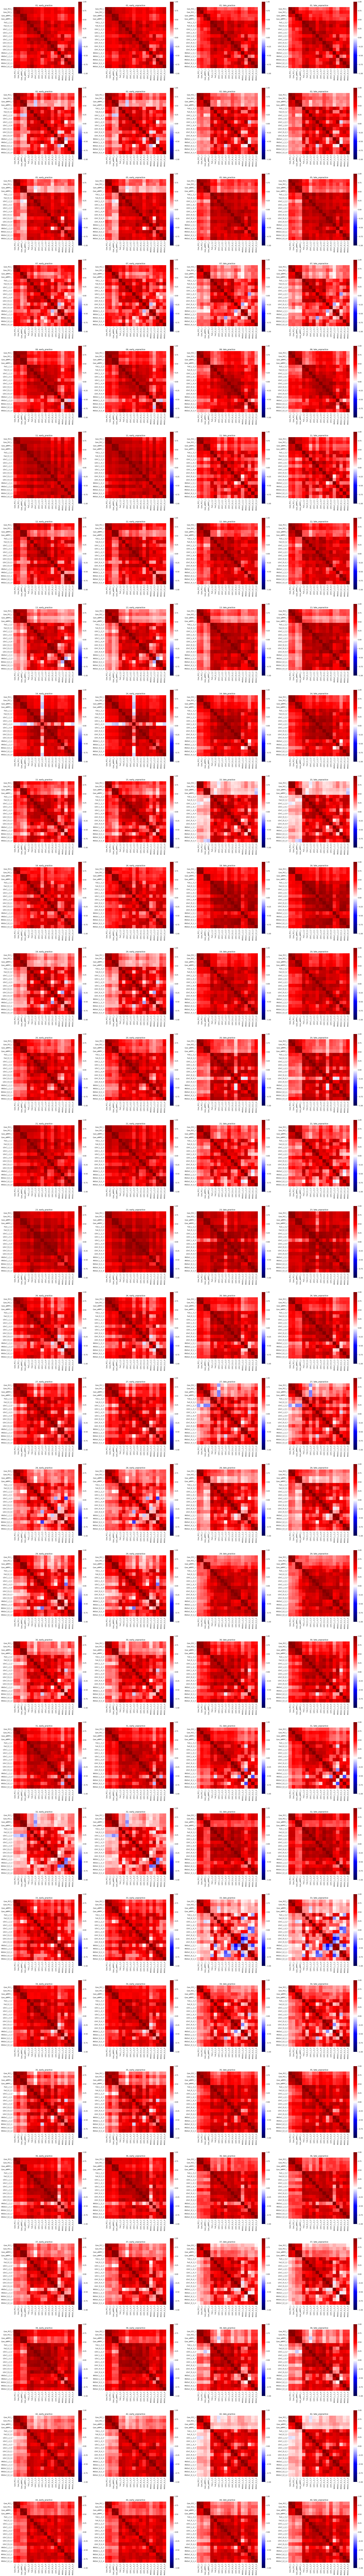

In [9]:
subjs = GA.list_subj
fig, axes = plt.subplots(nrows=len(subjs), ncols=len(GA.list_stage), figsize=(len(GA.list_stage)*10, len(subjs)*10))

corrmats = {}
for i, subj in enumerate(subjs):
    for j, stage in enumerate(GA.list_stage):        
        corrmat = GA.make_df_correlation_matrix(subj, stage=stage, group=group)
        ## plot matrices by an individual subject
        ax = sns.heatmap(corrmat
                         , square=True, cmap='seismic', cbar=True
                         , robust=True
                         , vmin=-1., vmax=1.
                         , xticklabels=sorted_rois, yticklabels=sorted_rois, ax=axes[i][j])
        ax.set_title('%s, %s'%(subj, stage))
        if i < 1:ㅇㅇ
            corrmats[stage] = corrmat
        else:
            corrmats[stage] += corrmat
# fig.savefig(fname=join(GA.dir_script,'matrices','%s_DMN_core-Yeo1_individual.MO.png'%GA.today))

In [11]:
## divide by a number of subjects to obtain the average value
for stage in GA.list_stage:
    for roiA in sorted_rois:
        for roiB in sorted_rois:
            corrmats[stage].loc[roiA,roiB] /= len(subjs)

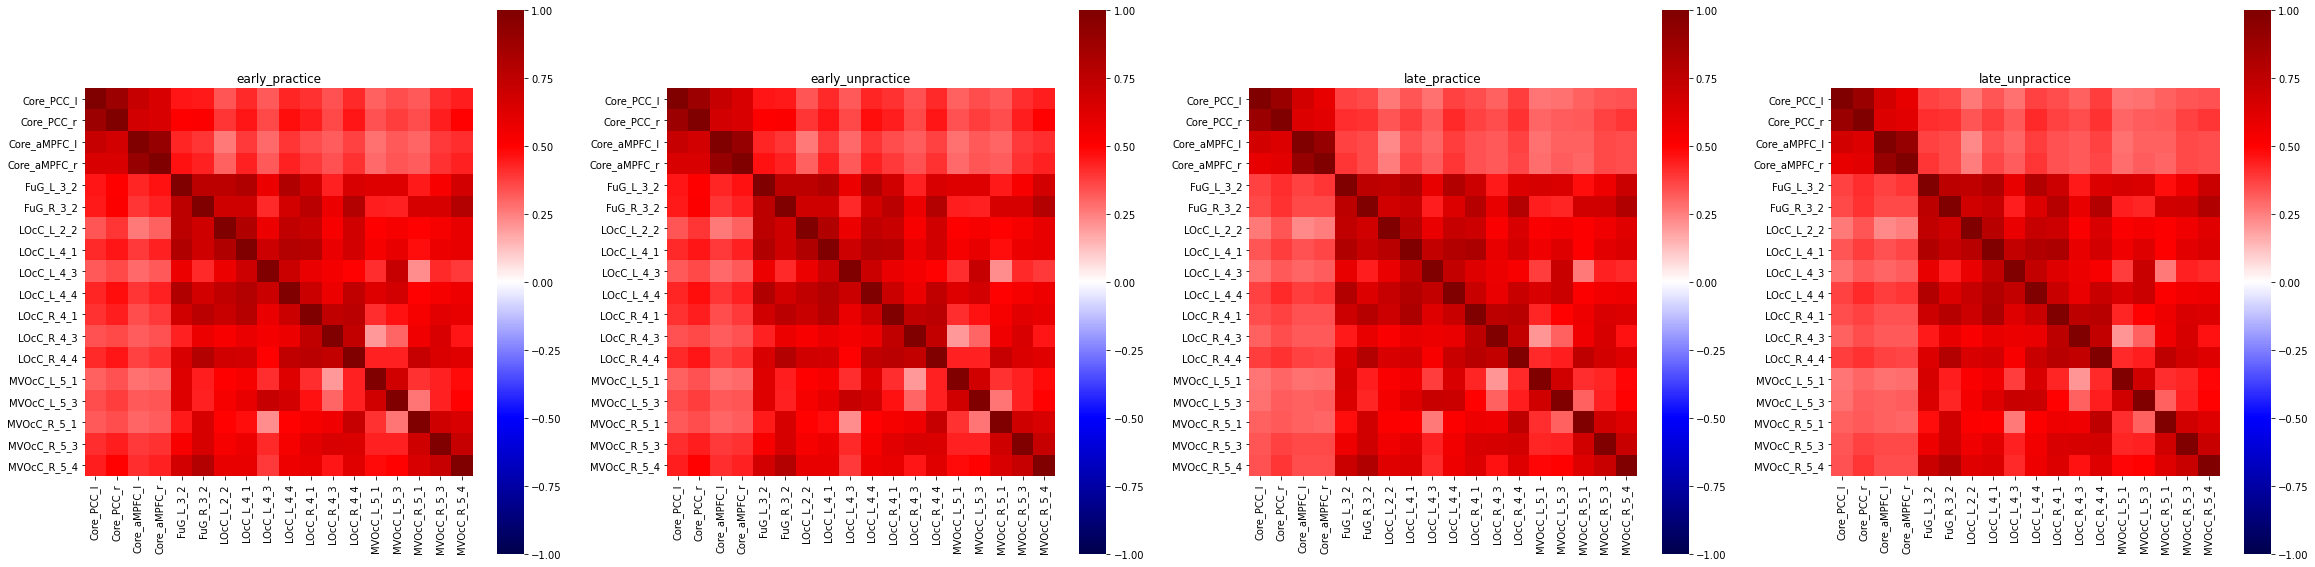

In [16]:
## plot group results
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(40, 10))
for i, stage in enumerate(GA.list_stage):
        ax = sns.heatmap(corrmats[stage]
                         , square=True, cmap='seismic', cbar=True
        #                  , robust=True
                         , vmin=-1., vmax=1.
                         , xticklabels=sorted_rois, yticklabels=sorted_rois, ax=axes[i])
        ax.set_title('%s'%stage)

## 5. Correlation between the change in the visual-DMN core integration and improvement in success rate

In [68]:
def convert_key_into_regions(rois, key):
    (g1,g2) = key
    a, b = list(rois.keys())[g1-1], list(rois.keys())[g2-1]
    return a, b

In [80]:
def plot_interaction(X, Y, key, ax):
    ax = sns.regplot(x=X, y=Y, ci=GA.sig1*100, truncate=False, ax=ax)
    a, b = convert_key_into_regions(rois=rois_, key=key)
    ax.set_ylabel('Reward GB-GA')
    ax.set_xlabel('%s-%s GB-GA'%(a,b))
    ax.set_title('r=%.4f (p=%.3f)' % (*scipy.stats.pearsonr(x=X, y=Y),))
    ax.set_xlim(-0.6, 0.6)
    ax.set_ylim(-0., 0.8)
    ax.axvline(x=0, color='k', linestyle='--', alpha=0.25)

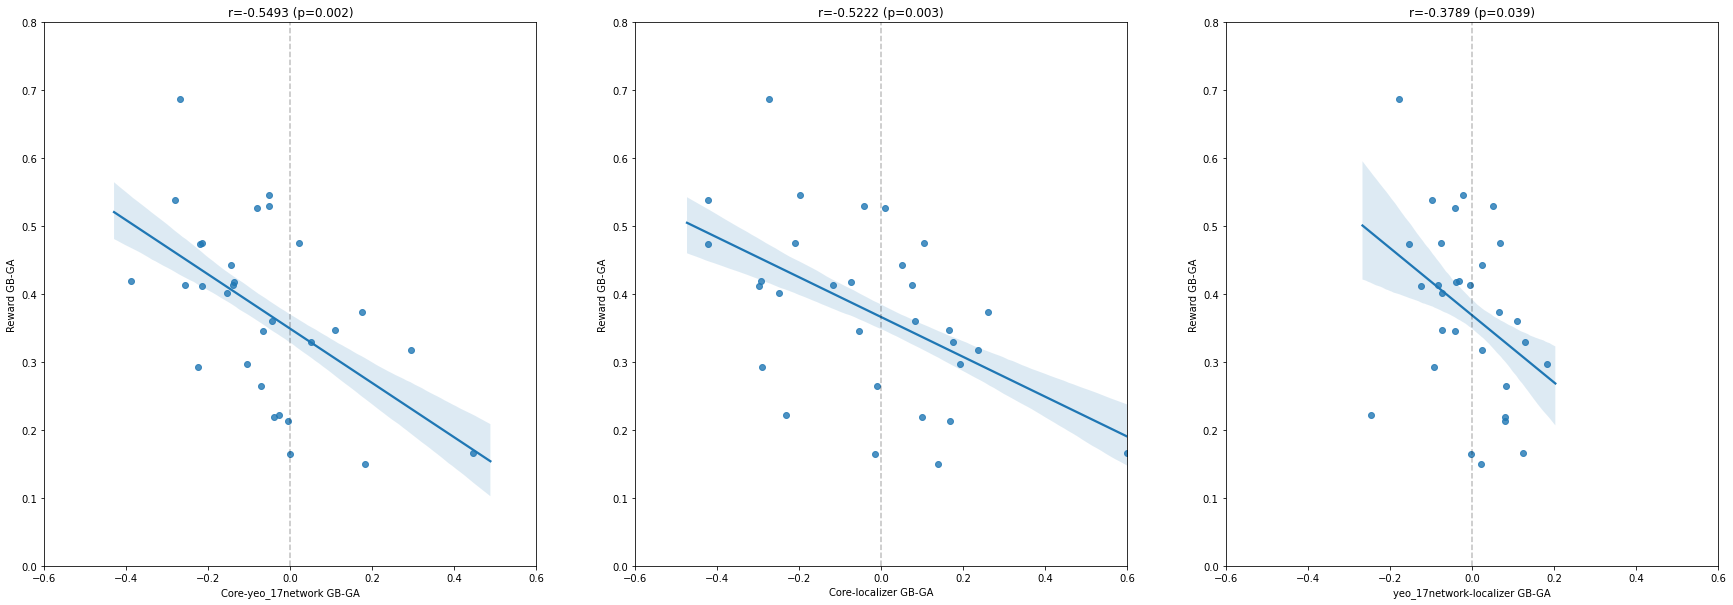

In [82]:
Y = GA.del_RewardRate

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,10))
for i, (key, X) in enumerate(res.items()):
    plot_interaction(X, Y, key=key, ax=axes[i])

fig.savefig(fname=join(GA.dir_script,'%s.Core-Yeo17-Localizer.png'%GA.today))

In [71]:
## Lower-Tailed t-Test
for key, X in res.items():
    a, b = convert_key_into_regions(rois=rois_, key=key)
    print('%s-%s: '%(a,b), scipy.stats.ttest_1samp(X, popmean=0, alternative='less'))

Core-yeo_17network:  Ttest_1sampResult(statistic=-1.9528153035037956, pvalue=0.030276459976303273)
Core-localizer:  Ttest_1sampResult(statistic=-0.6572960883873944, pvalue=0.25808693053588955)
yeo_17network-localizer:  Ttest_1sampResult(statistic=-0.5973972418673471, pvalue=0.27743928281044106)


In [72]:
## Spearman correlation
for key, X in res.items():
    a, b = convert_key_into_regions(rois=rois_, key=key)
    print('%s-%s: '%(a,b), scipy.stats.spearmanr(X,Y))

Core-yeo_17network:  SpearmanrResult(correlation=-0.5692992213570635, pvalue=0.0010258884981883543)
Core-localizer:  SpearmanrResult(correlation=-0.49454949944382637, pvalue=0.005468034039843503)
yeo_17network-localizer:  SpearmanrResult(correlation=-0.41401557285873186, pvalue=0.022939131729780765)


In [73]:
## wilcoxon signed rank test
for key, X in res.items():
    a, b = convert_key_into_regions(rois=rois_, key=key)
    print('%s-%s: '%(a,b), scipy.stats.wilcoxon(X))

Core-yeo_17network:  WilcoxonResult(statistic=122.0, pvalue=0.023038144695472357)
Core-localizer:  WilcoxonResult(statistic=194.0, pvalue=0.4284300285458069)
yeo_17network-localizer:  WilcoxonResult(statistic=207.0, pvalue=0.5999359281677457)


---

### Previous works

In [15]:
X = res
Y = GA.del_RewardRate

- replication of diagonal 2.

Text(0.5, 1.0, 'r=-0.5594 (p=0.001)')

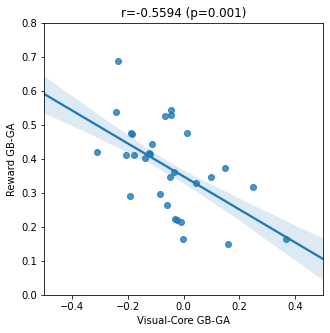

In [15]:
# fig = plt.figure(figsize=(5, 5))
# plt.xlim(-0.5, 0.5)
# plt.ylim(-0., 0.8)
# sns.regplot(x=X, y=Y, ci=GA.sig1*100, truncate=False)
# plt.ylabel('Reward GB-GA')
# plt.xlabel('Visual-Core GB-GA')
# plt.title('r=%.4f (p=%.3f)' % (*scipy.stats.pearsonr(x=X, y=Y),))

In [16]:
# ## Lower-Tailed t-Test
# scipy.stats.ttest_1samp(X, popmean=0, alternative='less')

Ttest_1sampResult(statistic=-1.9650511664948784, pvalue=0.029526146162293616)

- replication of diagonal 1.

Text(0.5, 1.0, 'r=-0.5493 (p=0.002)')

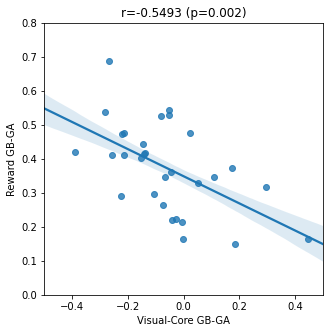

In [9]:
fig = plt.figure(figsize=(5, 5))
plt.xlim(-0.5, 0.5)
plt.ylim(-0., 0.8)
sns.regplot(x=X, y=Y, ci=GA.sig1*100, truncate=False)
plt.ylabel('Reward GB-GA')
plt.xlabel('Visual-Core GB-GA')
plt.title('r=%.4f (p=%.3f)' % (*scipy.stats.pearsonr(x=X, y=Y),))

In [10]:
## Lower-Tailed t-Test
scipy.stats.ttest_1samp(X, popmean=0, alternative='less')

Ttest_1sampResult(statistic=-1.952815303503796, pvalue=0.030276459976303245)

In [11]:
scipy.stats.spearmanr(X,Y)

SpearmanrResult(correlation=-0.5692992213570635, pvalue=0.0010258884981883543)

In [12]:
scipy.stats.wilcoxon(X)

WilcoxonResult(statistic=122.0, pvalue=0.023038144695472357)

- replication of diagonal 0.

Text(0.5, 1.0, 'r=-0.5272 (p=0.003)')

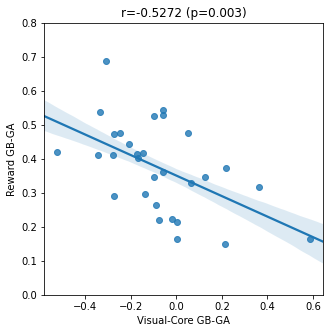

In [12]:
# fig = plt.figure(figsize=(5, 5))
# # plt.xlim(-0.5, 0.5)
# plt.ylim(-0., 0.8)
# sns.regplot(x=X, y=Y, ci=GA.sig1*100, truncate=False)
# plt.ylabel('Reward GB-GA')
# plt.xlabel('Visual-Core GB-GA')
# plt.title('r=%.4f (p=%.3f)' % (*scipy.stats.pearsonr(x=X, y=Y),))

In [11]:
# ## Lower-Tailed t-Test
# scipy.stats.ttest_1samp(X, popmean=0, alternative='less')

Ttest_1sampResult(statistic=-1.8848507537598362, pvalue=0.034753651181442746)

### Partial Correlation by training_day

In [19]:
with open(join(GA.dir_behav,'training_day_n30.1D'),'r') as fr:
    Z = np.genfromtxt(fr, delimiter='\n')

In [26]:
Z_unit = Z/np.linalg.norm(Z)

In [27]:
X_ortho = X - np.matmul(np.outer(Z_unit,Z_unit),X)
Y_ortho = Y - np.matmul(np.outer(Z_unit,Z_unit),Y)

In [ ]:
## regress global activity out

Text(0.5, 1.0, 'r=-0.4123 (p=0.024)')

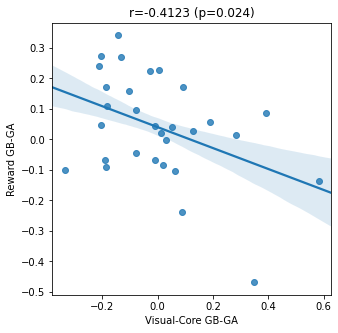

In [17]:
## 1st-order partial of the replication 0.5
X=X_ortho
Y=Y_ortho

fig = plt.figure(figsize=(5, 5))
sns.regplot(x=X, y=Y, ci=GA.sig1*100, truncate=False)
plt.ylabel('Reward GB-GA')
plt.xlabel('Visual-Core GB-GA')
plt.title('r=%.4f (p=%.3f)' % (*scipy.stats.pearsonr(x=X, y=Y),))